In [16]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
FOLD = 0

In [4]:
EXP_PATH = Path.cwd()
ROOT_DIR = EXP_PATH.parents[2]
exp_name = EXP_PATH.name
RAW_DATA_DIR = ROOT_DIR / 'data' / 'original_data'
DATA_DIR = ROOT_DIR / 'data' / 'kaggle_dataset' / 'irohith_tfrecords'
SAVE_DIR = ROOT_DIR / 'outputs' / exp_name / f'fold{FOLD}'
SAVE_DIR.mkdir(parents=True, exist_ok=True)

In [54]:
oof_df = pd.read_csv(SAVE_DIR / 'oof_df.csv')
train_df = pd.read_csv(ROOT_DIR / 'data' / 'created_data' / 'train2.csv')

<Axes: ylabel='Frequency'>

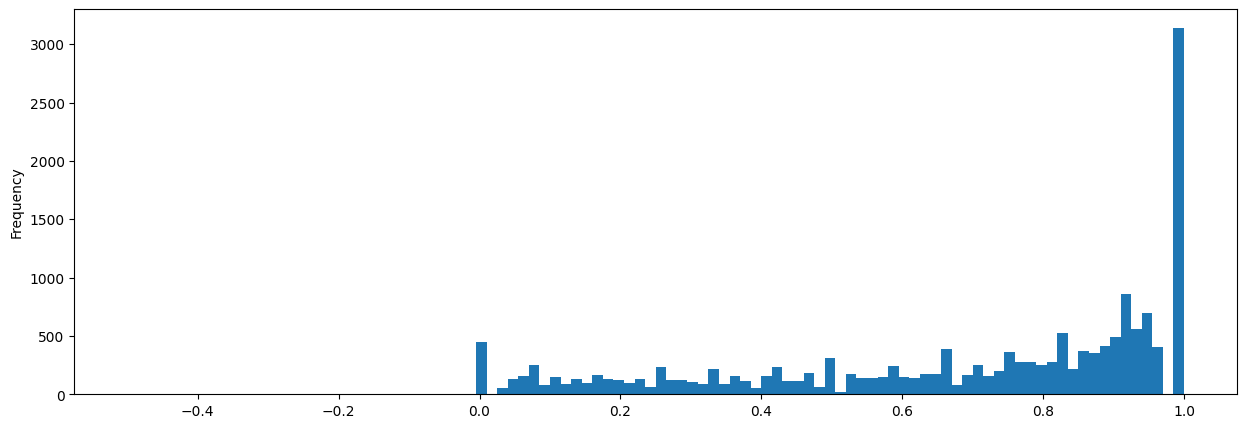

In [35]:
# oof_df['score'].plot(kind='hist', bins=np.linspace(0.65, 0.99, 50), figsize=(15, 5))
oof_df['score'].plot(kind='hist', bins=100, figsize=(15, 5))

In [36]:
oof_df

,sequence_id,phrase,pred,score,fold
0,1494438637,gladys guzman,gladys ghazan,0.769231,0
1,1494454903,8780 old 13th,8780 olda 13h,0.846154,0
2,1494472407,+62-879-37-82,/enhi,0.000000,0
3,1494503729,www.china-ycyb.com/arduinoprof,www.chia-ycyba.com/arduinopro,0.900000,0
4,1494515517,7642 south beulah road,7642 south beulah road,1.000000,0
...,...,...,...,...,...
16995,1975215809,409 locust place north,41 ce r,0.272727,0
16996,1975251416,custo-de-vida,custon-de-vida,0.923077,0
16997,1975337682,alexis good,lexisagood,0.818182,0
16998,1975349526,7617 west winchester court,7617 west winchester court,1.000000,0


In [37]:
oof_df.query('0.45 < score < 0.5')

,sequence_id,phrase,pred,score,fold
17,1495168081,2762 valmora dr,272al moara,0.466667,0
44,1496268711,www.10x10.co.kr/utkukaynar,1kutkukaynar,0.461538,0
143,1499156033,deborah mccarty,mecorth cak,0.466667,0
144,1499241537,https://ecoflow.com/cex/fierce,http:s://ow.co.com/,0.466667,0
362,1506496599,8362 west weir street,8362 wmoue r sa,0.476190,0
...,...,...,...,...,...
16798,1968725770,+60-263-135-3662-2512,60-23436-242,0.476190,0
16810,1968974283,155872 west ring street,55872 nguret,0.478261,0
16841,1969906243,8596 whispering oak trail,9 hishorgoaail,0.480000,0
16964,1973835547,+233-74-88605,3748-865,0.461538,0


In [38]:
oof_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sequence_id  17000 non-null  int64  
 1   phrase       17000 non-null  object 
 2   pred         16996 non-null  object 
 3   score        16996 non-null  float64
 4   fold         17000 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [70]:
oof_df['len_phrase'] = oof_df['phrase'].apply(lambda x: len(x))
oof_df['len_pred'] = oof_df['pred'].astype(str).apply(lambda x: len(x))

<Axes: xlabel='len_phrase'>

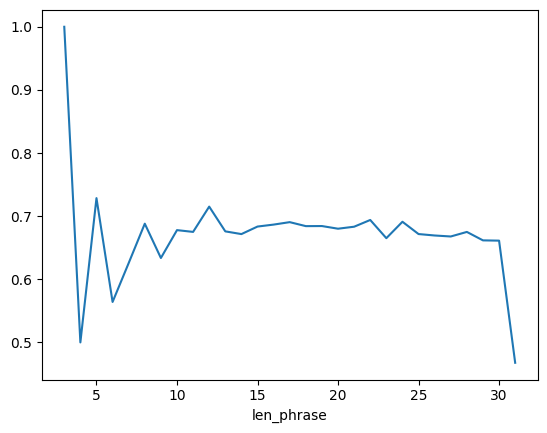

In [52]:
oof_df.groupby('len_phrase')['score'].mean().plot()

In [47]:
oof_df

,sequence_id,phrase,pred,score,fold,len_pred,len_phrase
0,1494438637,gladys guzman,gladys ghazan,0.769231,0,13,13
1,1494454903,8780 old 13th,8780 olda 13h,0.846154,0,13,13
2,1494472407,+62-879-37-82,/enhi,0.000000,0,5,13
3,1494503729,www.china-ycyb.com/arduinoprof,www.chia-ycyba.com/arduinopro,0.900000,0,29,30
4,1494515517,7642 south beulah road,7642 south beulah road,1.000000,0,22,22
...,...,...,...,...,...,...,...
16995,1975215809,409 locust place north,41 ce r,0.272727,0,7,22
16996,1975251416,custo-de-vida,custon-de-vida,0.923077,0,14,13
16997,1975337682,alexis good,lexisagood,0.818182,0,10,11
16998,1975349526,7617 west winchester court,7617 west winchester court,1.000000,0,26,26


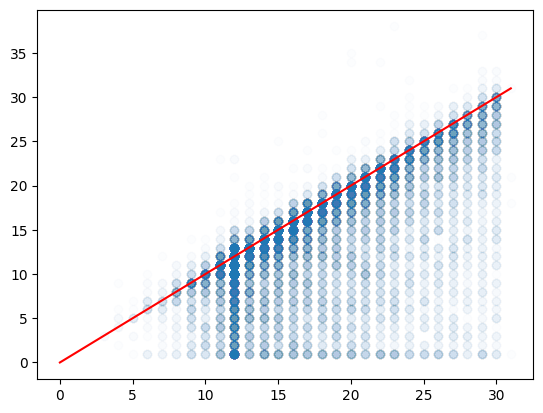

In [51]:
plt.scatter(oof_df['len_phrase'], oof_df['len_pred'], alpha=0.01)
plt.plot([0, 31], [0, 31], color='red')

In [53]:
oof_df.groupby('len_phrase')[['score']].count()
oof_df.groupby('len_phrase')['score'].mean()

len_phrase
3     1.000000
4     0.500000
5     0.728571
6     0.564103
7     0.625714
8     0.688073
9     0.633727
10    0.677885
11    0.675069
12    0.715120
13    0.675909
14    0.671608
15    0.683534
16    0.686646
17    0.690531
18    0.684211
19    0.684339
20    0.680125
21    0.683294
22    0.693963
23    0.665126
24    0.691134
25    0.671657
26    0.669379
27    0.667811
28    0.675027
29    0.661652
30    0.661217
31    0.467742
Name: score, dtype: float64

In [56]:
oof_df = oof_df.merge(train_df[['sequence_id', 'participant_id', 'n_frames', 'n_nan_left_hand', 'n_nan_right_hand']], how='left', on='sequence_id')

In [71]:
oof_df

,sequence_id,phrase,pred,score,fold,participant_id,n_frames,n_nan_left_hand,n_nan_right_hand,hand_frame,len_phrase,len_pred
0,1494438637,gladys guzman,gladys ghazan,0.769231,0,181,107,107,54,53,13,13
1,1494454903,8780 old 13th,8780 olda 13h,0.846154,0,4,98,98,51,47,13,13
2,1494472407,+62-879-37-82,/enhi,0.000000,0,203,185,146,185,39,13,5
3,1494503729,www.china-ycyb.com/arduinoprof,www.chia-ycyba.com/arduinopro,0.900000,0,102,241,50,241,191,30,29
4,1494515517,7642 south beulah road,7642 south beulah road,1.000000,0,236,133,133,25,108,22,22
...,...,...,...,...,...,...,...,...,...,...,...,...
16995,1975215809,409 locust place north,41 ce r,0.272727,0,20,120,120,107,13,22,7
16996,1975251416,custo-de-vida,custon-de-vida,0.923077,0,93,150,150,31,119,13,14
16997,1975337682,alexis good,lexisagood,0.818182,0,63,82,82,40,42,11,10
16998,1975349526,7617 west winchester court,7617 west winchester court,1.000000,0,230,278,31,278,247,26,26


In [66]:
oof_df['hand_frame'] = oof_df['n_frames'] - np.min(oof_df[['n_nan_left_hand', 'n_nan_right_hand']], axis=1)

In [78]:
oof_df

,sequence_id,phrase,pred,score,fold,participant_id,n_frames,n_nan_left_hand,n_nan_right_hand,hand_frame,len_phrase,len_pred
0,1494438637,gladys guzman,gladys ghazan,0.769231,0,181,107,107,54,53,13,13
1,1494454903,8780 old 13th,8780 olda 13h,0.846154,0,4,98,98,51,47,13,13
2,1494472407,+62-879-37-82,/enhi,0.000000,0,203,185,146,185,39,13,5
3,1494503729,www.china-ycyb.com/arduinoprof,www.chia-ycyba.com/arduinopro,0.900000,0,102,241,50,241,191,30,29
4,1494515517,7642 south beulah road,7642 south beulah road,1.000000,0,236,133,133,25,108,22,22
...,...,...,...,...,...,...,...,...,...,...,...,...
16995,1975215809,409 locust place north,41 ce r,0.272727,0,20,120,120,107,13,22,7
16996,1975251416,custo-de-vida,custon-de-vida,0.923077,0,93,150,150,31,119,13,14
16997,1975337682,alexis good,lexisagood,0.818182,0,63,82,82,40,42,11,10
16998,1975349526,7617 west winchester court,7617 west winchester court,1.000000,0,230,278,31,278,247,26,26


h3. 知りたいこと
- frameの長さとphraseの長さとscoreの関係性
    - nanじゃないframeが短い & phraseが長いとscoreは下がる
    - nanじゃないframeが短いがphraseも短ければscoreは高いかも？

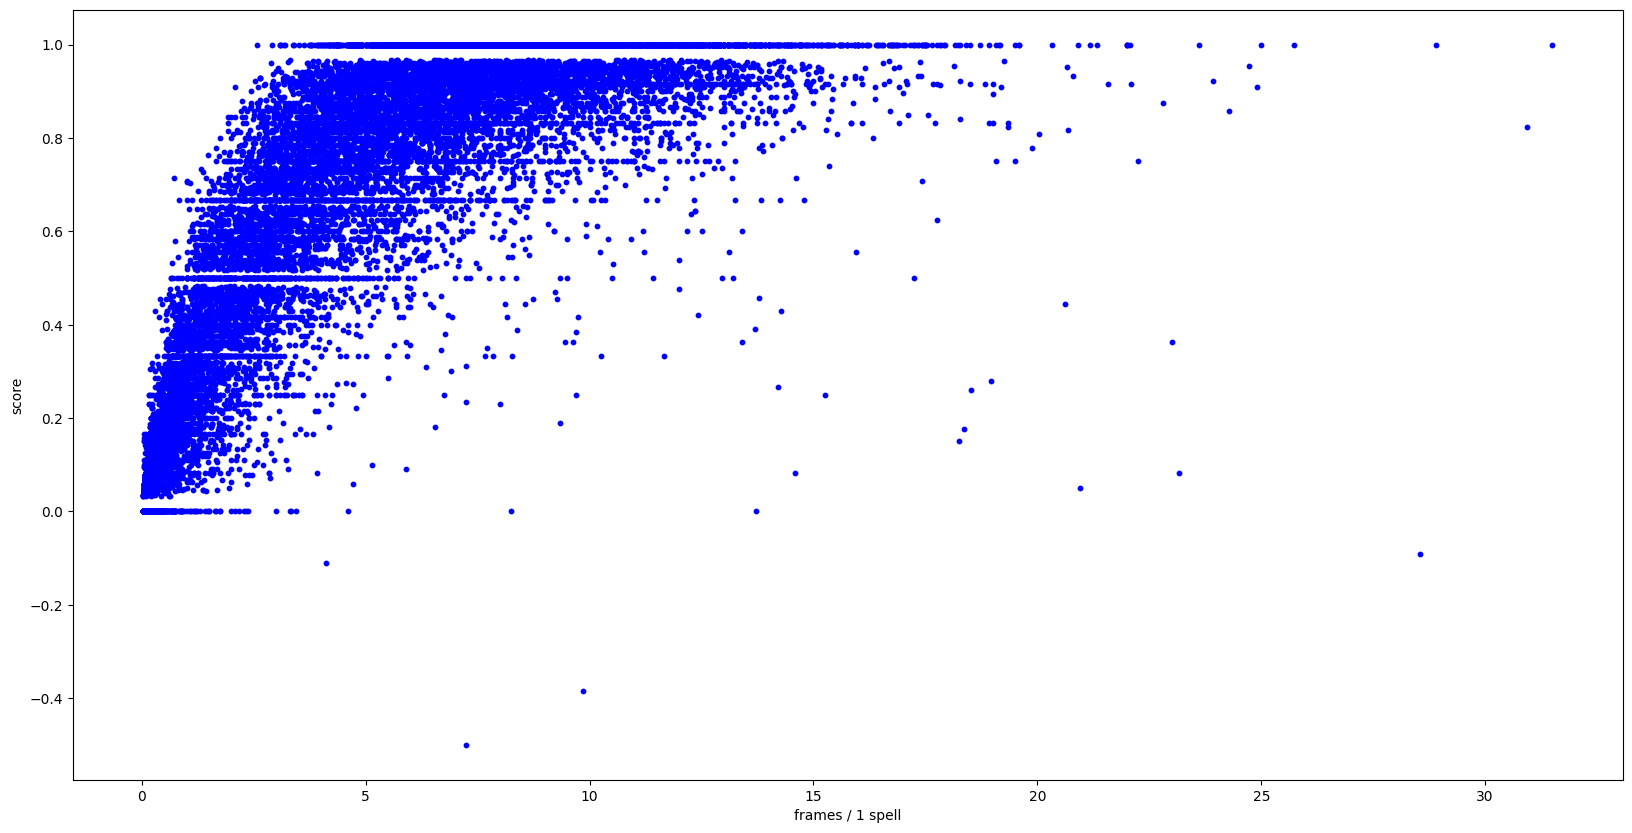

In [81]:
plt.figure(figsize=(20, 10))
plt.scatter(x=oof_df['hand_frame'] / oof_df['len_phrase'], y=oof_df['score'], c='b', s=10)
plt.xlabel('frames / 1 spell')
plt.ylabel('score')
plt.show()

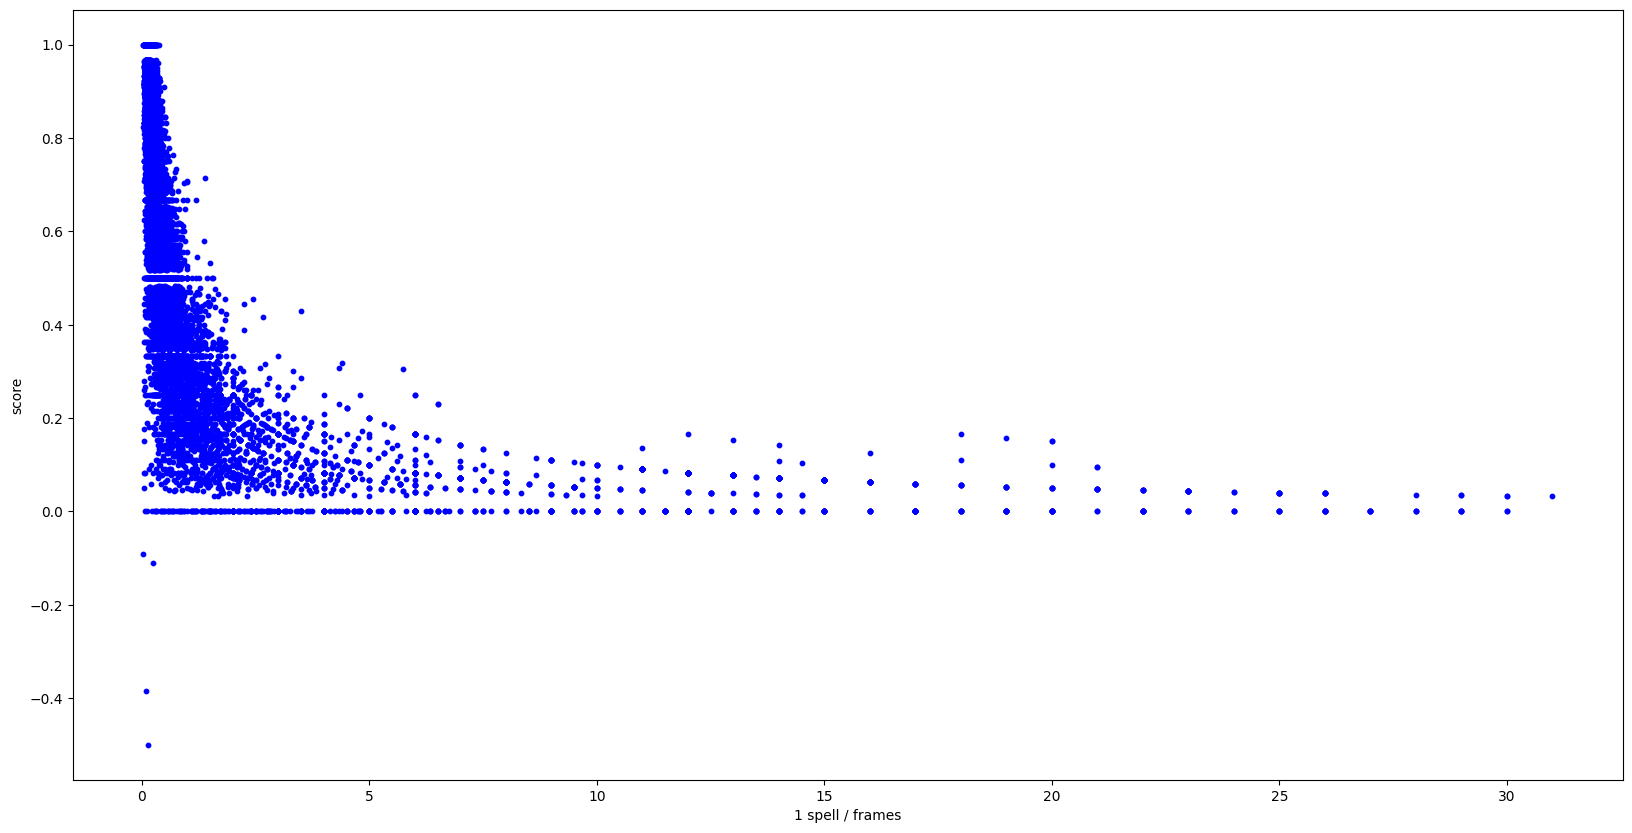

In [83]:
plt.figure(figsize=(20, 10))
plt.scatter(x=oof_df['len_phrase'] / oof_df['hand_frame'], y=oof_df['score'], c='b', s=10)
plt.xlabel('1 spell / frames')
plt.ylabel('score')
plt.show()

In [103]:
oof_df.query('hand_frame/ len_phrase <= 2.5')

,sequence_id,phrase,pred,score,fold,participant_id,n_frames,n_nan_left_hand,n_nan_right_hand,hand_frame,len_phrase,len_pred
20,1495414996,5010 southton,oloso,0.153846,0,88,49,49,18,31,13,5
29,1495645069,+55-39-2785-86-677-81,+--54--,0.285714,0,168,188,186,169,19,21,7
33,1495795503,roberto farley,93l e,0.142857,0,178,46,40,46,6,14,5
34,1495810555,https://microproducers.com/,mo,0.074074,0,36,6,6,4,2,27,2
36,1495929422,7771 jerris lane,7 pa,0.187500,0,225,160,160,147,13,16,4
...,...,...,...,...,...,...,...,...,...,...,...,...
16988,1974978160,joe acevedo,eeve,0.363636,0,81,41,41,21,20,11,4
16990,1974997141,466 coventry trl,86 wonorete,0.375000,0,158,104,104,84,20,16,11
16991,1975070349,+86-950-1436-23-625,+950-4-515,0.421053,0,113,234,233,195,39,19,10
16995,1975215809,409 locust place north,41 ce r,0.272727,0,20,120,120,107,13,22,7


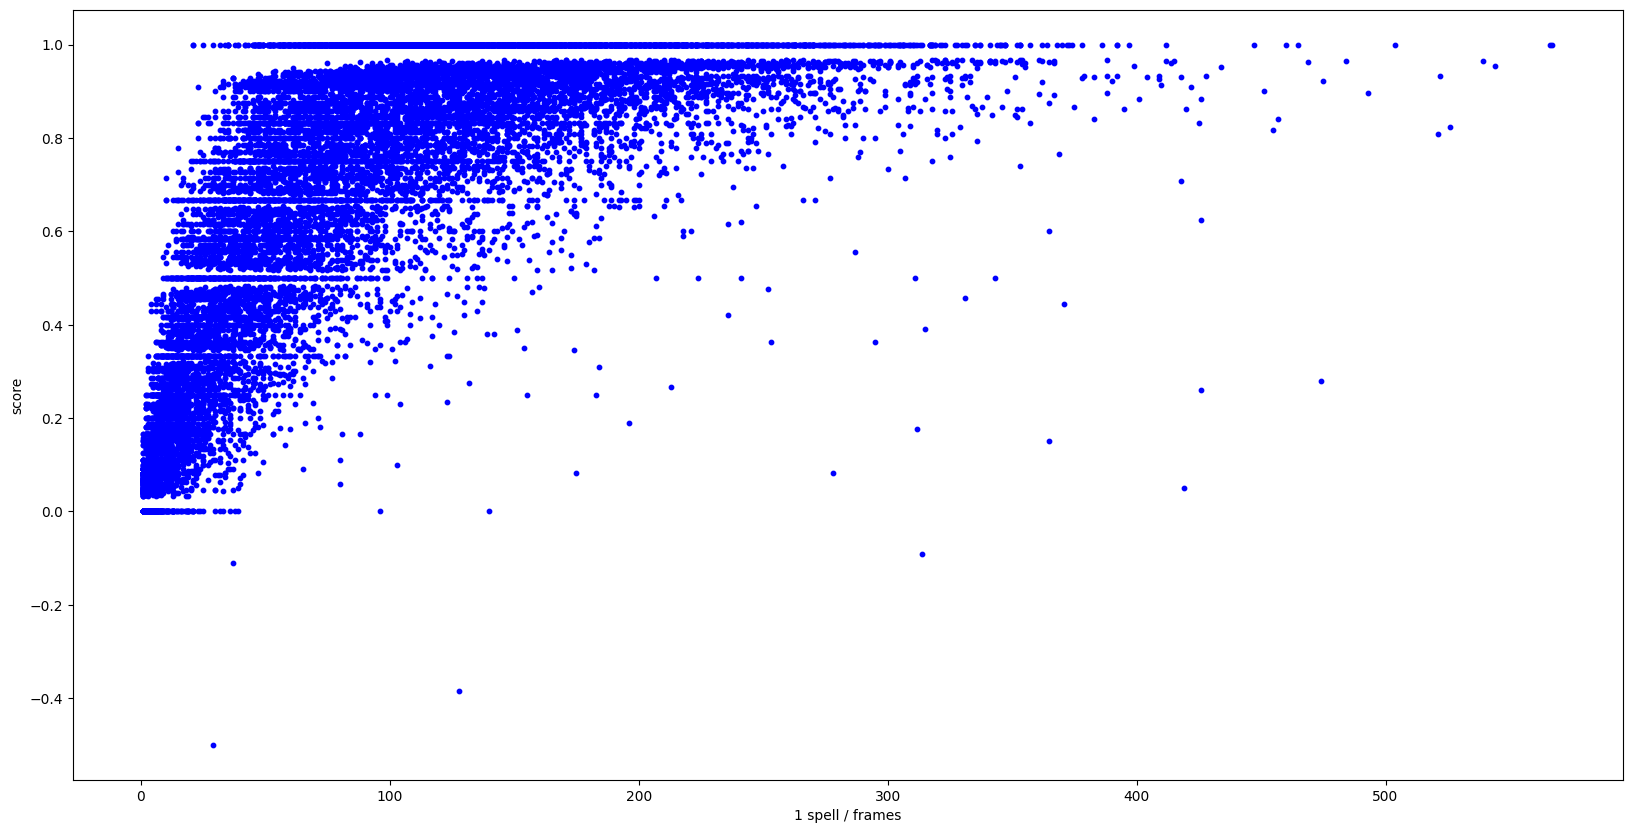

In [104]:
plt.figure(figsize=(20, 10))
plt.scatter(x=oof_df['hand_frame'], y=oof_df['score'], c='b', s=10)
plt.xlabel('1 spell / frames')
plt.ylabel('score')
plt.show()

In [106]:
oof_df.query('0.6 < score < 0.65').head(30)

,sequence_id,phrase,pred,score,fold,participant_id,n_frames,n_nan_left_hand,n_nan_right_hand,hand_frame,len_phrase,len_pred
21,1495417566,4286 boring court,46 boin cor,0.647059,0,115,119,119,76,43,17,11
57,1496629783,denisha/screen+wallpaper,enis/screenaillpa,0.625000,0,53,198,120,107,91,24,17
67,1496895614,3355 east 1st alley,est 1st dalley,0.631579,0,151,105,105,33,72,19,14
150,1499399083,5152 229,+51-52-229,0.625000,0,236,52,52,19,33,8,10
159,1499743238,larissa mitchell,labris maichel,0.625000,0,236,82,82,53,29,16,14
208,1501407120,/training-and-support-2020-22,-anrd-suport-2020-22,0.620690,0,223,197,65,188,132,29,20
210,1501457148,2283 brazan lane,2832283 buraztlan lane,0.625000,0,136,111,111,25,86,16,22
250,1502796032,5155 natl forest develop road,551 firest velqp road,0.620690,0,169,146,146,97,49,29,21
278,1503840541,42 west kings way,4 stkings rac,0.647059,0,20,133,94,91,42,17,13
353,1506286179,612 jackson avenue northwest,612iacksonen rbenorhwest,0.642857,0,68,247,247,142,105,28,24
